# Required Import

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn import metrics

# Loading and Exploring dataset

In [4]:
data = pd.read_csv("telecom_customer_churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
print(data.info)

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [10]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [18]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [11]:
data.shape

(7043, 21)

# Handle Missing Values in Dataset
+ Null values
+ Duplicates

In [12]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Remove if any Duplicated

In [13]:
data.duplicated().sum()

0

# Formatting columns | Can be used to count number male and females. 
+ male   : 0
+ female : 1

In [25]:
data.replace(to_replace=["Male","Female"], value={0,1}, inplace=True)
data['gender']

0       1
1       0
2       0
3       0
4       1
       ..
7038    0
7039    1
7040    1
7041    0
7042    0
Name: gender, Length: 7043, dtype: int64

# Unique Number & count 

In [36]:
counts, unique = np.unique(data['tenure'], return_counts = True)
print(f"-------------- Unique Data ------------ \n{unique} \n-------------- Count ------------\n{counts}")

-------------- Unique Data ------------ 
[ 11 613 238 200 176 133 110 131 123 119 116  99 117 109  76  99  80  87
  97  73  71  63  90  85  94  79  79  72  57  72  72  65  69  64  65  88
  50  65  59  56  64  70  65  65  51  61  74  68  64  66  68  68  80  70
  68  64  80  65  67  60  76  76  70  72  80  76  89  98 100  95 119 170
 362] 
-------------- Count ------------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]


In [37]:
counts, unique = np.unique(data['MonthlyCharges'], return_counts = True)
print(f"-------------- Unique Data ------------ \n{unique} \n-------------- Count ------------\n{counts}")

-------------- Unique Data ------------ 
[1 1 1 ... 2 1 1] 
-------------- Count ------------
[ 18.25  18.4   18.55 ... 118.6  118.65 118.75]


In [38]:
counts, unique = np.unique(data['TotalCharges'], return_counts = True)
print(f"-------------- Unique Data ------------ \n{unique} \n-------------- Count ------------\n{counts}")

-------------- Unique Data ------------ 
[11  1  1 ...  1  1  1] 
-------------- Count ------------
[' ' '100.2' '100.25' ... '999.45' '999.8' '999.9']


# feature Engineering

In [41]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['AvgMonthlySpend'] = data['TotalCharges'] / data['tenure']
data['AvgMonthlySpend']

0        29.850000
1        55.573529
2        54.075000
3        40.905556
4        75.825000
           ...    
7038     82.937500
7039    102.262500
7040     31.495455
7041     76.650000
7042    103.704545
Name: AvgMonthlySpend, Length: 7043, dtype: float64

+ month-to-month = 1
+ else 0

In [43]:
data['IsMonthlyContract'] = (data['Contract'] == 'Month-to-month').astype(int)
data['IsMonthlyContract']

0       1
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    1
7041    1
7042    0
Name: IsMonthlyContract, Length: 7043, dtype: int32

# Outlier 

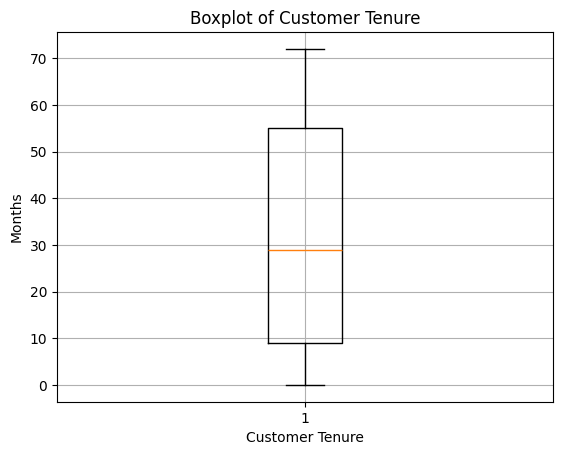

In [48]:
plt.boxplot(data['tenure'])
plt.title("Boxplot of Customer Tenure")
plt.grid("whitegrid")
plt.xlabel("Customer Tenure")
plt.ylabel("Months")
plt.show()

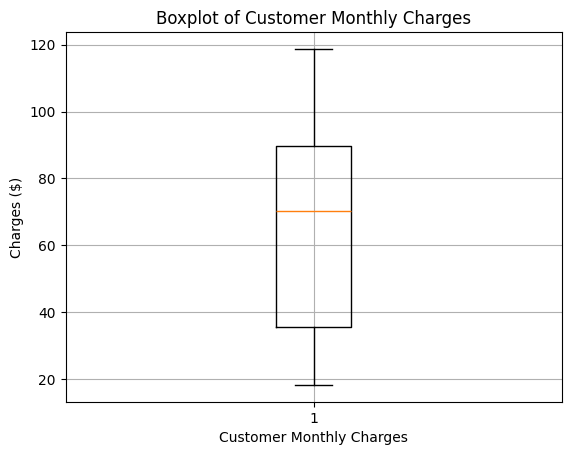

In [49]:
plt.boxplot(data['MonthlyCharges'])
plt.title("Boxplot of Customer Tenure")
plt.grid("whitegrid")
plt.xlabel("Customer Monthly Charges")
plt.ylabel("Charges ($)")
plt.title("Boxplot of Customer Monthly Charges")
plt.show()

# Spliting dataset

In [50]:
X = data.drop("Churn", axis=1) 
y = data["Churn"]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
X_train.shape

(5634, 22)

In [56]:
X_test.shape

(1409, 22)

In [57]:
y_test.shape

(1409,)

In [58]:
y_train.shape

(5634,)

# 

In [61]:
data.to_csv("Preprocessed_data.csv", index=False)